1주차 과제2 따릉이 데이터 EDA _백주원
=====

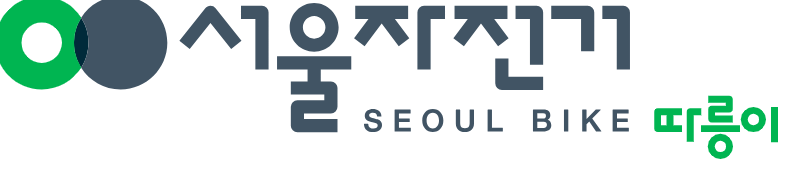

In [1]:
from IPython.display import Image 
Image("./따릉이로고.PNG")

# 0. 도메인 알아보기

1) 서울 자전거 따릉이 
- 서울특별시에서 2015년부터 시행한 완전 무인 공공자전거 대여 서비스
- 서울시 관계자 "저렴한 요금, 풍부한 이용 인구, 촘촘한 인프라 구축 등이 따릉이의 성장 배경"
- 2019년 따릉이 만족도 설문조사에 따르면 36.3%가 출퇴근용, 26.8%가 여가 및 취미, 17%가 운동 목적으로 따릉이를 이용한다고 답했다.

2) 2018년 대한민국 기후
- 7월1일~15일 : 15일 간의 매우 짧은 장마, 1973년 이후 두번째로 짧은 장마
- 7월 중 ~ 8월 말: 기상 관측 이래 역대 공식 최고기온을 기록하여 대한민국 역사상 최악의 폭염을 기록
- 10월 : 강수량이 태풍으로 인해 1973년 이후 두 번째로 많았음. 또한, 이상 저온 현상 발생
- 11월 : 내내 큰 추위 없었음

3) 2018년 대한민국 상황
- 이례적으로 A형·B형 독감 바이러스가 동시 유행하여 2017년 12월 초 유행주의보가 내려진 지 겨우 한 달 만에 환자가 6배 가까이 늘었음. 
- 6월14일~7월15일 : 러시아 월드컵 
- 10월1일~11월3일 : 4년 만에 우리나라에서 롤드컵 개최 

# 1. 가설 세우기

- 비가 올 때는 대여수가 적을 것이다. 
- 기온이 너무 춥거나 더운, 겨울과 한여름에는 대여수가 적을 것이다. 
- 평일보다 여가시간이 많은 휴일에 대여수가 많을 것이다. 
- 하루 중 출퇴근 시간에 대여수가 더 많을 것이다.

# 2. 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. 데이터 불러오기

In [3]:
# 데이터셋의 인코딩 종류 파악
import chardet
file_path = "./data/train.csv"
with open(file_path, "rb") as aa:  # 'rb':바이너리 모드(텍스트 파일 아닌 데이터)(텍스트 데이터는 r,w,a)    # aa: 매개변수
    result = chardet.detect(aa.readline())
    print(result["encoding"])

ISO-8859-1


In [4]:
data = pd.read_csv("./data/train.csv", encoding = "ISO-8859-1")

In [5]:
data

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


# 4. EDA

### 4-1. 데이터 살펴보기

|변수명|의미|
|---|---|
|Date|날짜 (일/월/년도)|
|Rented Bike Count|대여 자전거 수|
|Hour|시간|
|Temperature(°C)|기온|
|Humidity(%)|습도|
|Wind speed (m/s)|풍속|
|Visibility (10m)|가시성|
|Dew point temperature(°C)|이슬점|
|Solar Radiation (MJ/m2)|태양 복사량|
|Rainfall(mm)|강수량|
|Snowfall(cm)|눈의 양|
|Seasons|계절|
|Holiday|휴일|
|Functioning Day|운영일|

2017-12-01 ~ 2018-11-30(365일)동안 시간별 대여자전거수,기상정보,날짜정보 (날짜,날씨,휴일/대여수) 

In [6]:
data.info() 
# 날짜 변수가 object임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        7008 non-null   object 
 1   Rented Bike Count           7008 non-null   int64  
 2   Hour                        7008 non-null   int64  
 3   Temperature(¡ÆC)            6306 non-null   float64
 4   Humidity(%)                 7008 non-null   int64  
 5   Wind speed (m/s)            6303 non-null   float64
 6   Visibility (10m)            7008 non-null   int64  
 7   Dew point temperature(¡ÆC)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)     7008 non-null   float64
 9   Rainfall(mm)                7008 non-null   float64
 10  Snowfall (cm)               7008 non-null   float64
 11  Seasons                     6309 non-null   object 
 12  Holiday                     7008 non-null   object 
 13  Functioning Day             7008 

In [7]:
data.describe()

,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes


In [9]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes
7007,20/09/2018,1290,17,19.3,76,2.1,2000,14.9,0.21,0.0,0.0,NaN,No Holiday,Yes


In [10]:
data.nunique()

Date                           365
Rented Bike Count             2038
Hour                            24
Temperature(¡ÆC)               540
Humidity(%)                     89
Wind speed (m/s)                63
Visibility (10m)              1701
Dew point temperature(¡ÆC)     551
Solar Radiation (MJ/m2)        343
Rainfall(mm)                    56
Snowfall (cm)                   49
Seasons                          4
Holiday                          2
Functioning Day                  2
dtype: int64

In [11]:
# object형 변수 : 값 확인
print(data['Seasons'].unique())
print(data['Holiday'].unique())
print(data['Functioning Day'].unique())

[nan 'Spring' 'Autumn' 'Summer' 'Winter']
['No Holiday' 'Holiday']
['Yes' 'No']


### 4-2. 결측치 및 중복 데이터 확인

In [12]:
data.isna().sum()

Date                            0
Rented Bike Count               0
Hour                            0
Temperature(¡ÆC)              702
Humidity(%)                     0
Wind speed (m/s)              705
Visibility (10m)                0
Dew point temperature(¡ÆC)      0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                       699
Holiday                         0
Functioning Day                 0
dtype: int64

In [13]:
# 기온이 결측인 값들 확인해보기
data[data['Temperature(¡ÆC)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
6,04/07/2018,941,11,NaN,60,2.3,1861,21.3,2.61,0.0,0.0,Summer,No Holiday,Yes
11,24/05/2018,1390,7,NaN,61,1.3,1818,5.1,0.42,0.0,0.0,Spring,No Holiday,Yes
18,10/04/2018,133,21,NaN,70,7.3,1634,11.9,0.00,0.5,0.0,Spring,No Holiday,Yes
19,10/11/2018,754,0,NaN,77,0.9,433,7.4,0.00,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,27/02/2018,72,5,NaN,50,0.1,1026,-8.6,0.00,0.0,0.0,Winter,No Holiday,Yes
6979,23/02/2018,42,0,NaN,86,2.7,54,-0.3,0.00,0.4,0.4,Winter,No Holiday,Yes
6983,28/11/2018,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6999,15/11/2018,1416,17,NaN,38,1.4,884,-0.3,0.29,0.0,0.0,Autumn,No Holiday,Yes


In [14]:
# 풍속이 결측인 값들 확인해보기
data[data['Wind speed (m/s)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
10,21/03/2018,374,10,3.6,37,NaN,2000,-9.7,0.83,0.0,0.0,Spring,No Holiday,Yes
23,14/03/2018,309,1,13.7,73,NaN,1182,8.9,0.00,0.0,0.0,Spring,No Holiday,Yes
33,26/06/2018,26,14,21.0,97,NaN,381,20.4,0.26,2.5,0.0,Summer,No Holiday,Yes
51,09/01/2018,320,9,-6.0,61,NaN,1547,-12.3,0.13,0.0,0.6,Winter,No Holiday,Yes
52,16/07/2018,688,11,31.5,51,NaN,1498,20.1,2.83,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,11/10/2018,1398,21,NaN,52,NaN,2000,0.0,0.00,0.0,0.0,Autumn,No Holiday,Yes
6953,08/03/2018,17,5,3.1,90,NaN,974,1.6,0.00,0.0,0.0,Spring,No Holiday,Yes
6975,22/09/2018,1062,11,22.7,55,NaN,1297,13.1,1.86,0.0,0.0,Autumn,No Holiday,Yes
6993,06/05/2018,211,13,16.4,94,NaN,1947,15.4,0.78,0.0,0.0,Spring,No Holiday,Yes


In [15]:
# 계절이 결측인 값들 확인해보기
data[data['Seasons'].isna()]

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
22,31/08/2018,987,14,29.3,41,1.9,1928,14.6,3.00,0.0,0.0,NaN,No Holiday,Yes
30,09/11/2018,0,23,10.9,76,1.2,456,6.8,0.00,0.0,0.0,NaN,No Holiday,No
47,15/09/2018,1566,18,NaN,76,1.2,2000,19.6,0.12,0.0,0.0,NaN,No Holiday,Yes
55,24/01/2018,121,22,-15.2,45,4.0,2000,-24.4,0.00,0.0,0.7,NaN,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,15/03/2018,567,21,10.4,96,2.7,499,9.7,0.00,0.0,0.0,NaN,No Holiday,Yes
6968,22/07/2018,772,1,NaN,60,0.8,2000,18.8,0.00,0.0,0.0,NaN,No Holiday,Yes
6983,28/11/2018,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6988,13/06/2018,2088,14,26.6,50,2.4,1119,15.3,2.95,0.0,0.0,NaN,No Holiday,Yes


In [16]:
data[data.duplicated()] #중복행 확인 
# 없음

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


### 4-3. 상관관계

In [17]:
data_num = data[['Rented Bike Count','Hour','Temperature(¡ÆC)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(¡ÆC)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]

In [18]:
data_num

,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0
1,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0
2,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0
3,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0
4,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...
7003,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0
7004,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0
7005,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0
7006,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0


Text(0.5, 1.0, 'correlation heatmap')

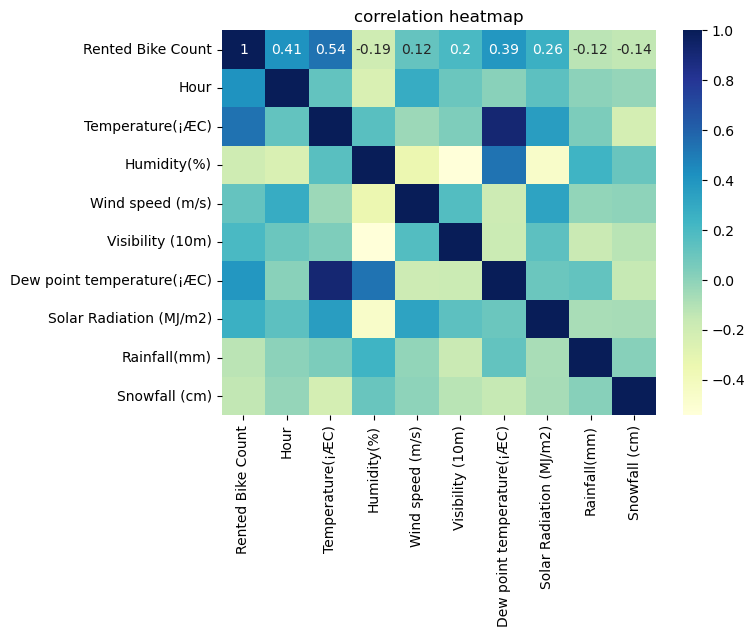

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(data_num.corr(),cmap = "YlGnBu",annot= True)
plt.title('correlation heatmap')

In [20]:
data_num.corr()

,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.412000,0.541908,-0.194577,0.116835,0.199378,0.386236,0.262888,-0.124764,-0.140378
Hour,0.412000,1.000000,0.122931,-0.241683,0.282618,0.101271,0.008633,0.142704,0.004299,-0.019116
Temperature(¡ÆC),0.541908,0.122931,1.000000,0.152777,-0.040290,0.038039,0.911766,0.360516,0.045058,-0.218021
Humidity(%),-0.194577,-0.241683,0.152777,1.000000,-0.342188,-0.542005,0.534907,-0.461830,0.237836,0.103439
Wind speed (m/s),0.116835,0.282618,-0.040290,-0.342188,1.000000,0.173654,-0.186479,0.330813,-0.013948,-0.000302
Visibility (10m),0.199378,0.101271,0.038039,-0.542005,0.173654,1.000000,-0.178756,0.144465,-0.172910,-0.117725
Dew point temperature(¡ÆC),0.386236,0.008633,0.911766,0.534907,-0.186479,-0.178756,1.000000,0.099315,0.121872,-0.151745
Solar Radiation (MJ/m2),0.262888,0.142704,0.360516,-0.461830,0.330813,0.144465,0.099315,1.000000,-0.074714,-0.071934
Rainfall(mm),-0.124764,0.004299,0.045058,0.237836,-0.013948,-0.172910,0.121872,-0.074714,1.000000,0.013482
Snowfall (cm),-0.140378,-0.019116,-0.218021,0.103439,-0.000302,-0.117725,-0.151745,-0.071934,0.013482,1.000000


### 4-4. 변수별 파악

#### Rented Bike Count
- 따릉이 대여수
- 종속 변수
- 수치형 변수(정수형)

In [21]:
print(data['Rented Bike Count'].value_counts())
print(data['Rented Bike Count'].value_counts().values)

Rented Bike Count
0       236
103      17
122      16
178      16
165      15
       ... 
2377      1
1424      1
2194      1
3146      1
2234      1
Name: count, Length: 2038, dtype: int64
[236  17  16 ...   1   1   1]


c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


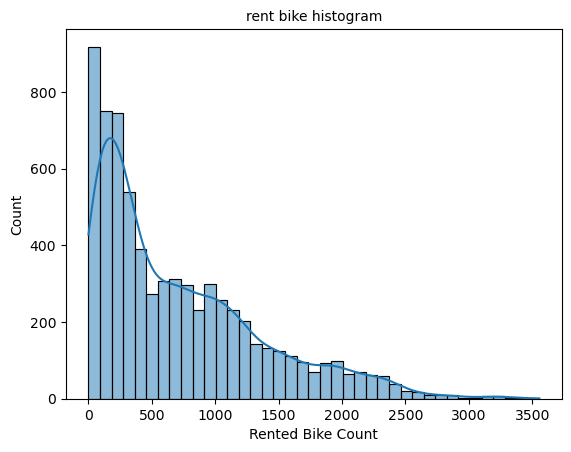

In [22]:
sns.histplot(data['Rented Bike Count'],kde=True)
plt.title('rent bike histogram',fontsize=10)
plt.show()

<Axes: >

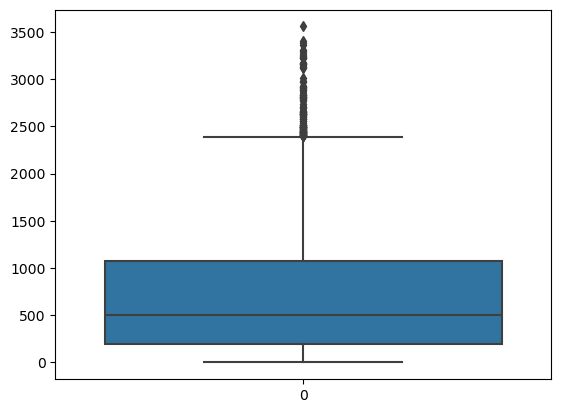

In [23]:
sns.boxplot(data['Rented Bike Count'])

In [24]:
print(data['Rented Bike Count'].mean())
print(data['Rented Bike Count'].quantile(0.75))
print(data['Rented Bike Count'].quantile(0.5))
print(data['Rented Bike Count'].quantile(0.25))

708.597602739726
1071.0
505.5
191.0


#### Date
- 날짜타입으로 데이터타입 변경 후 정렬
- 20171201 ~ 20181130
- 한Date 당 Hour값 개수 여러개. 동일X (12-24)

In [25]:
# 날짜 데이터로 데이터타입 변환
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\foma\AppData\Local\Temp\ipykernel_4708\3503156132.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [26]:
data['Date'].dtype

dtype('<M8[ns]')

In [27]:
# 날짜 기준으로 정렬
datass = data.sort_values(by='Date')

In [28]:
datass['Date'].dtype

dtype('<M8[ns]')

In [29]:
datass.head()

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2198,2017-12-01,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
2442,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5689,2017-12-01,447,14,3.0,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes
613,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
1659,2017-12-01,398,22,NaN,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes


In [30]:
datass.tail()

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6820,2018-11-30,720,12,6.6,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes
4091,2018-11-30,116,4,NaN,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
1627,2018-11-30,456,1,1.3,63,2.0,1379,-4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
54,2018-11-30,740,13,7.1,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes
121,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes


In [31]:
datass['Date'].value_counts()
# 하루 당 시간대 일정하지 않음

Date
2018-02-14    24
2017-12-01    23
2018-01-19    23
2018-04-23    23
2018-07-08    23
              ..
2018-08-06    15
2018-01-13    14
2018-05-19    14
2018-03-11    13
2018-05-04    12
Name: count, Length: 365, dtype: int64

c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Rented Bike Count'>

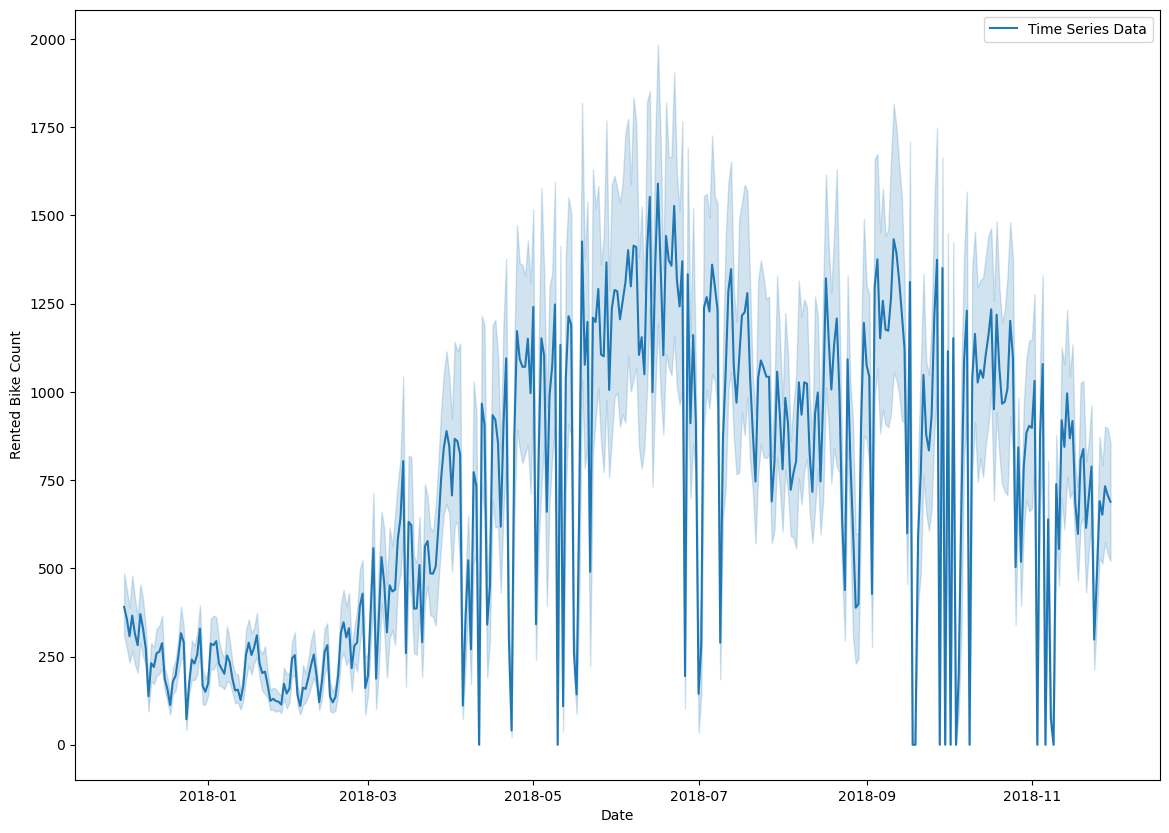

In [32]:
# 1년동안 날짜에 따른 대여량 시각화 
plt.figure(figsize=(14, 10))
sns.lineplot(data=datass, x='Date', y='Rented Bike Count', label='Time Series Data')
# 흐린파란색 영역 : 같은 날짜의 다른 시간대 대여량
# 이 그래프에 이상치는 표시가 안됨??

In [33]:
# 월별 데이터프레임 생성
months = {}
for m in range(1, 13):
    months[m] = datass[datass['Date'].dt.month == m]

In [34]:
datass['Month'] = datass['Date'].dt.month

c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

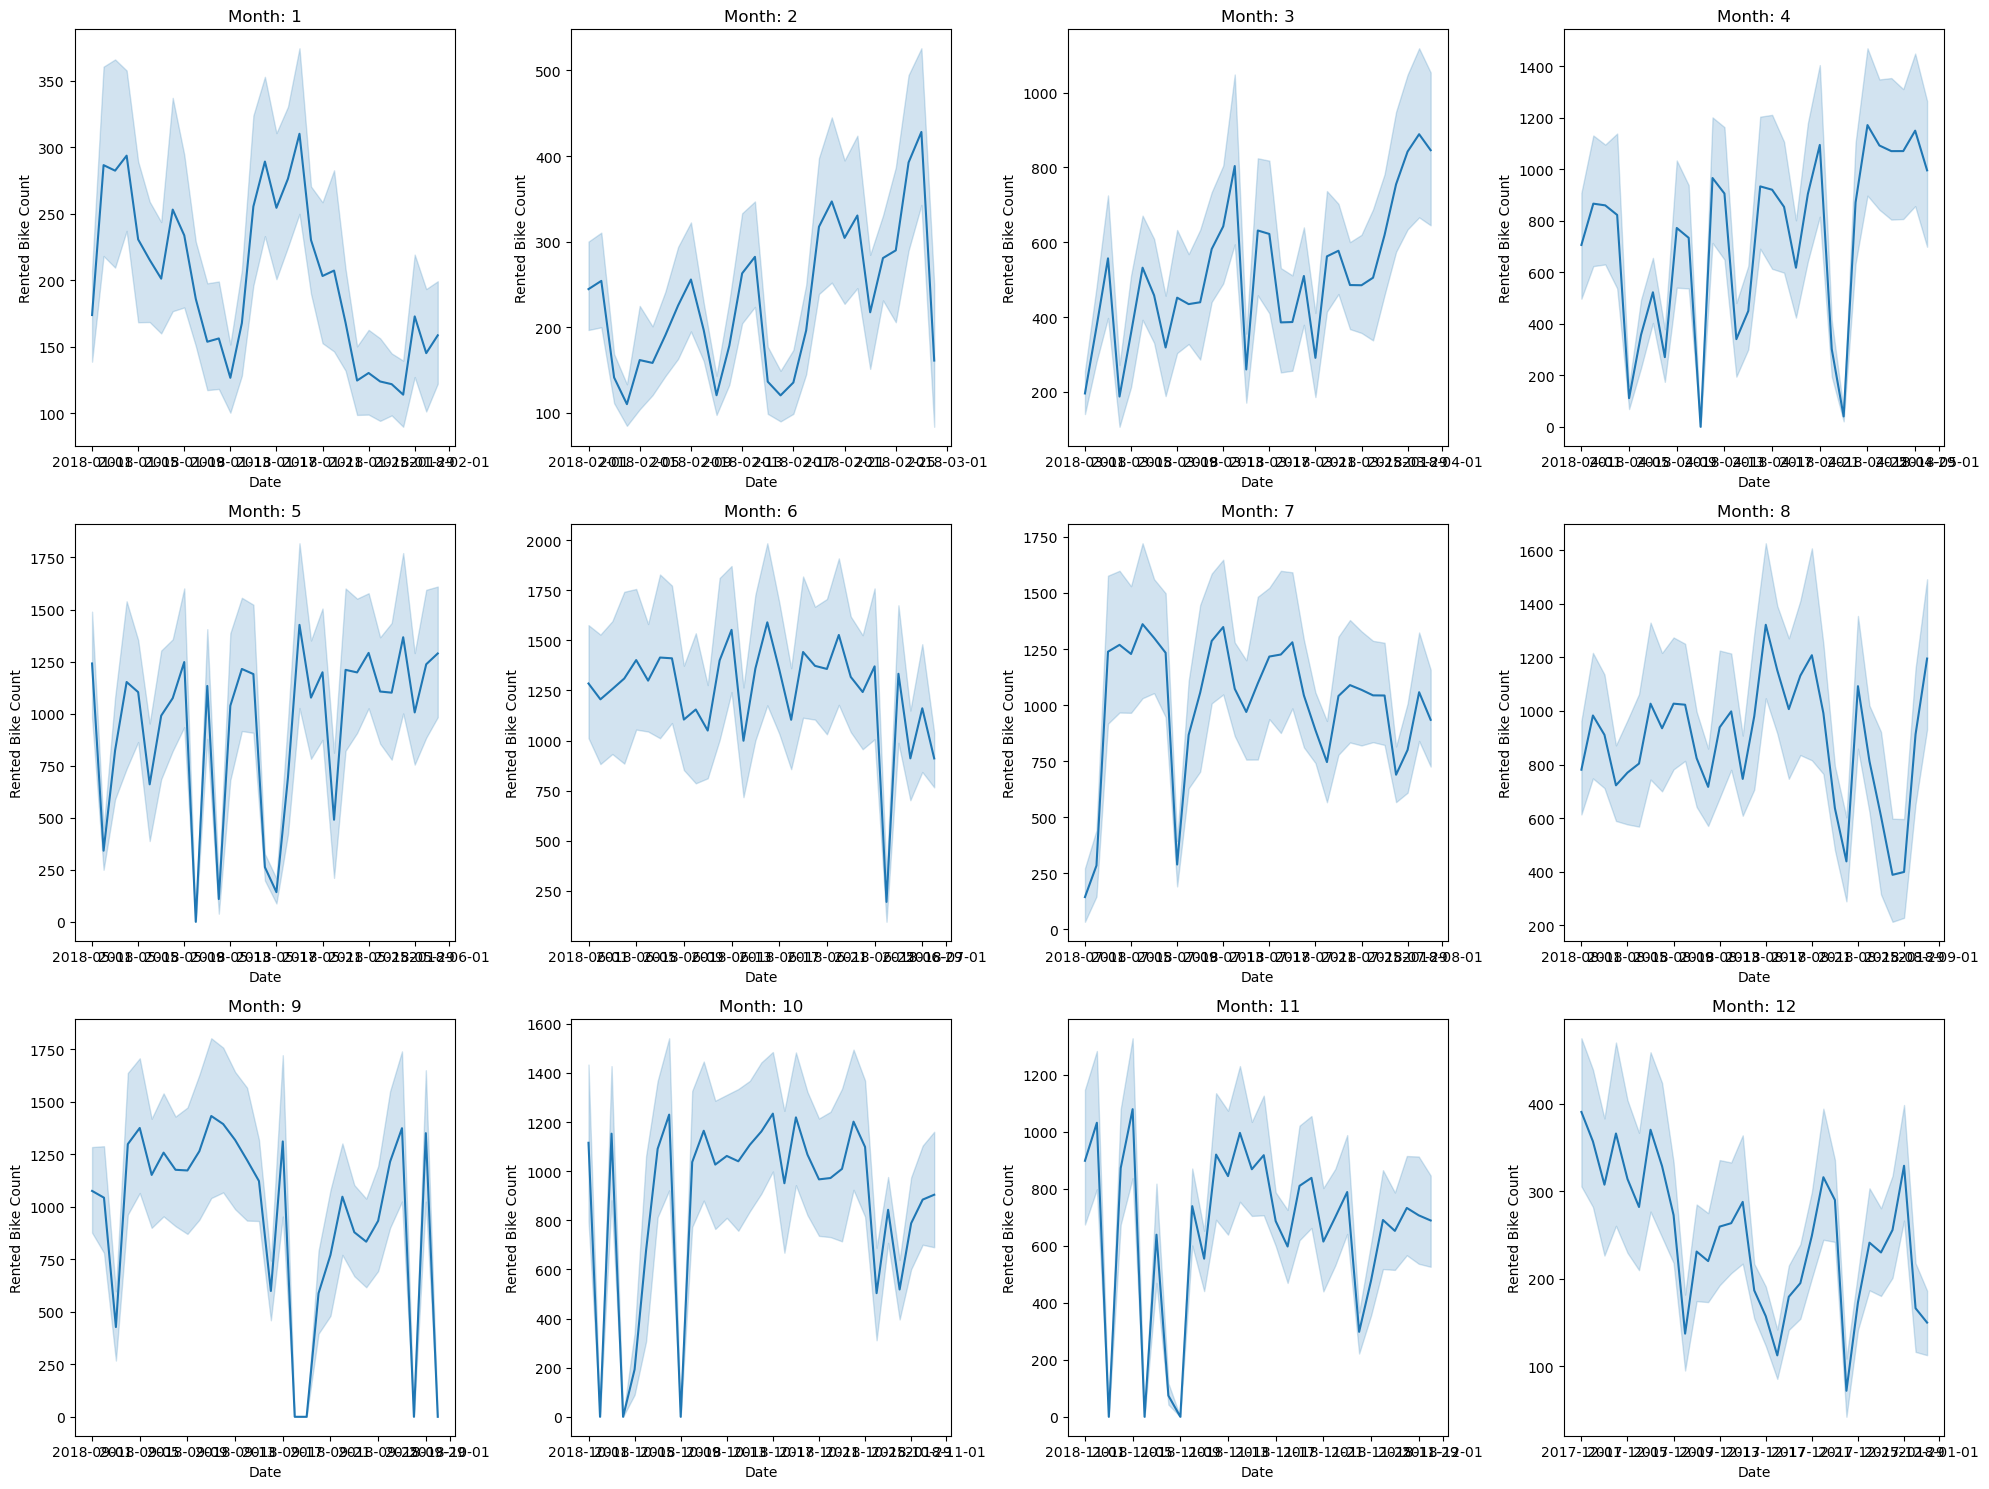

In [35]:
# 서브플롯 생성 (3x4 배열)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# 각 월별 데이터에 대해 선 그래프 그리기
for month, ax in zip(range(1, 13), axes):
    sns.lineplot(data=months[month], x='Date', y='Rented Bike Count', ax=ax)
    ax.set_title(f'Month: {month}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

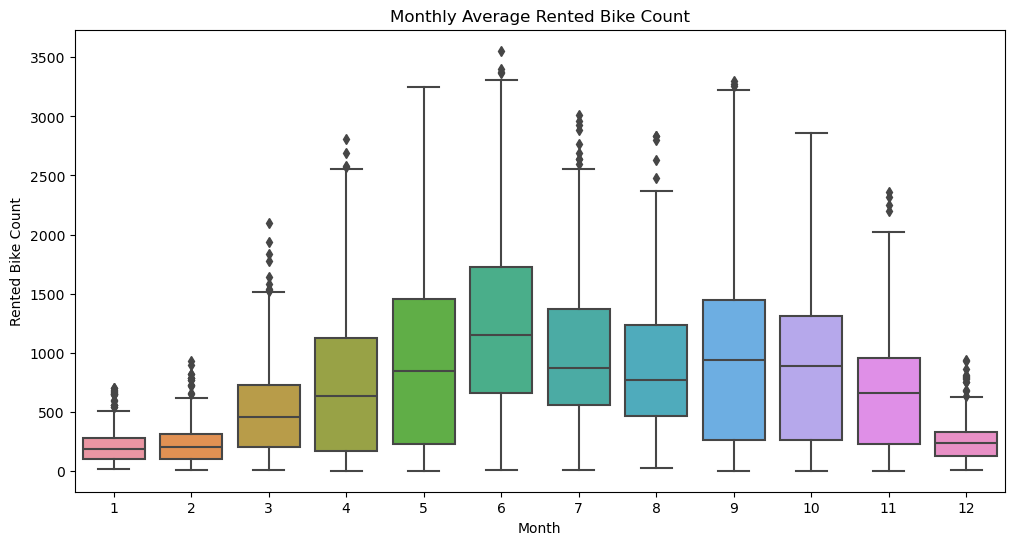

In [36]:
# 월별 대여량 비교
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Rented Bike Count', data=datass)
plt.title('Monthly Average Rented Bike Count')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.show()

#### Seasons

- 계절이 어떤 날짜 기준으로 바뀌는지 확인 해야됨 (3.1/6.1/9.1/12.1) 
- 날짜를 근거로 결측치 채우기
- 계절 별 대여량 시각화 - 박스플롯

In [37]:
# 계절이 변경되는 날짜 확인하기
print(datass[datass['Seasons']=='Winter']['Date'])
print(datass[datass['Seasons']=='Spring']['Date'])
print(datass[datass['Seasons']=='Summer']['Date'])
print(datass[datass['Seasons']=='Autumn']['Date'])

2198   2017-12-01
2442   2017-12-01
5689   2017-12-01
613    2017-12-01
1659   2017-12-01
          ...    
3813   2018-02-28
6651   2018-02-28
216    2018-02-28
3489   2018-02-28
3382   2018-02-28
Name: Date, Length: 1570, dtype: datetime64[ns]
1101   2018-03-01
1817   2018-03-01
4277   2018-03-01
3027   2018-03-01
3546   2018-03-01
          ...    
6125   2018-05-31
5361   2018-05-31
3967   2018-05-31
4864   2018-05-31
5376   2018-05-31
Name: Date, Length: 1554, dtype: datetime64[ns]
2023   2018-06-01
1917   2018-06-01
3929   2018-06-01
3789   2018-06-01
5739   2018-06-01
          ...    
685    2018-08-31
6015   2018-08-31
5007   2018-08-31
3      2018-08-31
6313   2018-08-31
Name: Date, Length: 1598, dtype: datetime64[ns]
6228   2018-09-01
1239   2018-09-01
6744   2018-09-01
4303   2018-09-01
493    2018-09-01
          ...    
6820   2018-11-30
4091   2018-11-30
1627   2018-11-30
54     2018-11-30
121    2018-11-30
Name: Date, Length: 1587, dtype: datetime64[ns]


In [38]:
# 계절 변수 결측치 처리
for index, row in datass.iterrows():
    if (row['Date'] >= pd.to_datetime('2018-03-01')) & (row['Date'] < pd.to_datetime('2018-06-01')):
        datass.at[index, 'Seasons'] = 'Spring'
    elif (row['Date'] >= pd.to_datetime('2018-06-01')) & (row['Date'] < pd.to_datetime('2018-09-01')):
        datass.at[index, 'Seasons'] = 'Summer'
    elif (row['Date'] >= pd.to_datetime('2018-09-01')) & (row['Date'] < pd.to_datetime('2018-12-01')):
        datass.at[index, 'Seasons'] = 'Autumn'
    else:
        datass.at[index, 'Seasons'] = 'Winter'

In [39]:
datass.isna().sum()

Date                            0
Rented Bike Count               0
Hour                            0
Temperature(¡ÆC)              702
Humidity(%)                     0
Wind speed (m/s)              705
Visibility (10m)                0
Dew point temperature(¡ÆC)      0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                         0
Holiday                         0
Functioning Day                 0
Month                           0
dtype: int64

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

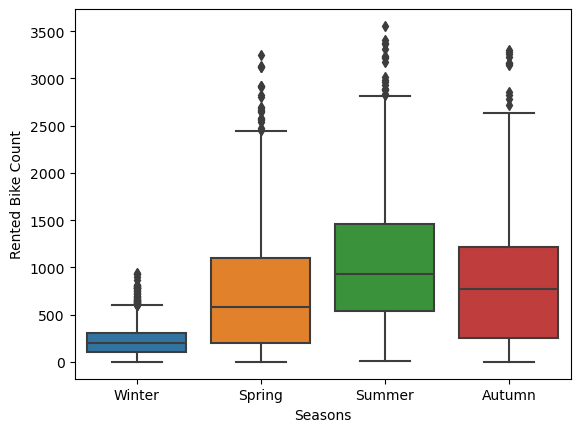

In [40]:
sns.boxplot(datass, x = 'Seasons',y='Rented Bike Count')

In [41]:
# 계절별 평균 대여수의 차이 가설검정
import scipy.stats as stats

# 계절별 데이터 나누기
spring_data = datass[datass['Seasons'] == 'Spring']['Rented Bike Count']
summer_data = datass[datass['Seasons'] == 'Summer']['Rented Bike Count']
fall_data = datass[datass['Seasons'] == 'Autumn']['Rented Bike Count']
winter_data = datass[datass['Seasons'] == 'Winter']['Rented Bike Count']

# ANOVA 검정 수행 - 네 집단의 평균 비교
statistic, p_value = stats.f_oneway(spring_data, summer_data, fall_data, winter_data)

# 결과 출력
print(f'ANOVA results:')
print(f'F-statistic: {statistic}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('통계적으로 유의미한 차이가 있습니다.')
else:
    print('통계적으로 유의미한 차이가 없습니다.')

# 귀무가설 기각 > 계절에 따른 대여수의 차이가 통계쩍으로 유의미함

ANOVA results:
F-statistic: 645.4101414082637
P-value: 0.0
통계적으로 유의미한 차이가 있습니다.


c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

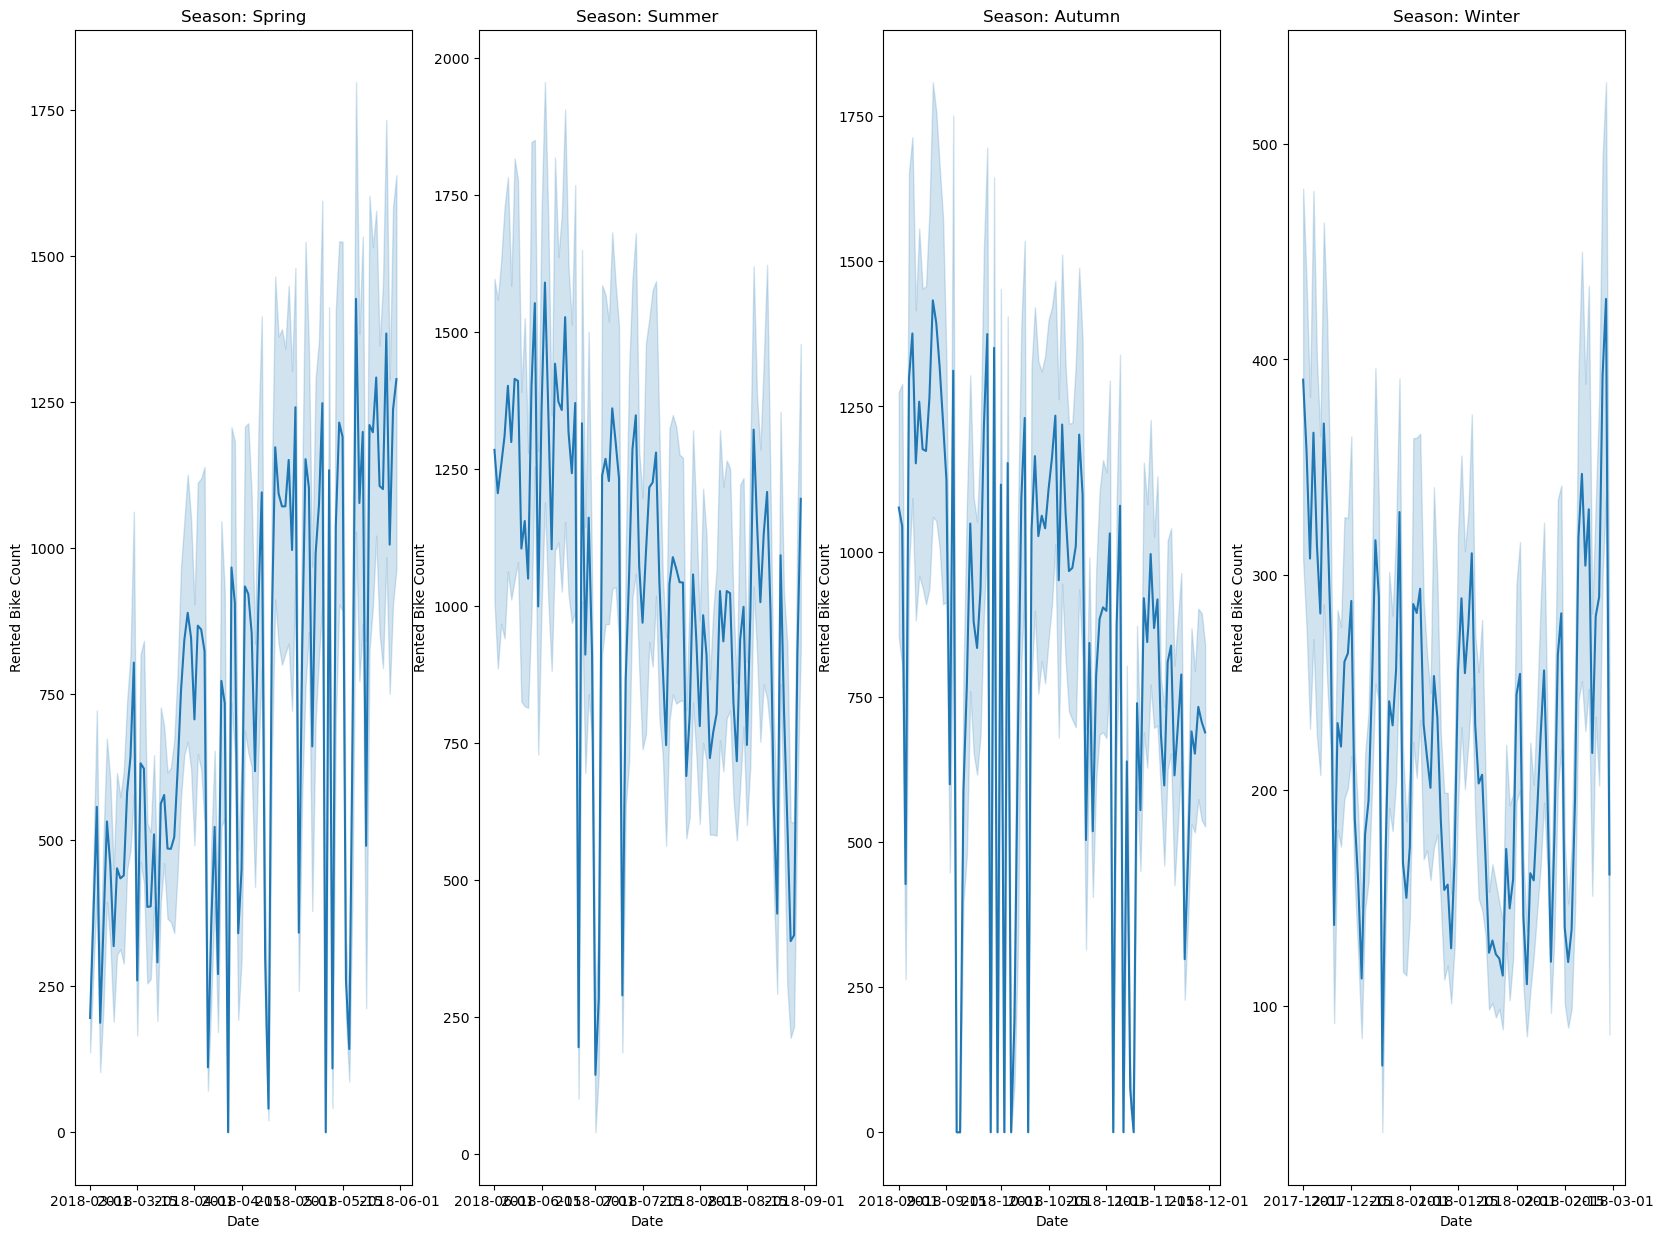

In [42]:
# 서브플롯 생성 (1x4 배열)
fig, axes = plt.subplots(1, 4, figsize=(20, 15))
axes = axes.flatten()

seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
for season, ax in zip(seasons, axes):
    season_data = datass[datass['Seasons'] == season]
    sns.lineplot(data=season_data, x='Date', y='Rented Bike Count', ax=ax)
    ax.set_title(f'Season: {season}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Rented Bike Count')
    # 이 그래프 보기 힘듦

#### Hour
- 시각화 - 시간 당 대여수. 얼마나 차이 나나 - 박스플롯

In [43]:
print(data['Hour'].value_counts().sort_values())

Hour
7     279
3     283
9     284
6     286
2     286
0     286
15    287
20    288
17    288
10    291
21    291
18    292
22    292
5     293
13    293
12    293
4     295
1     296
19    296
8     297
11    297
16    298
23    307
14    310
Name: count, dtype: int64


<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

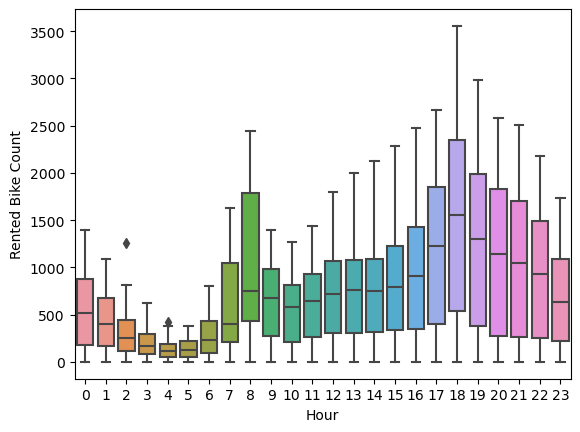

In [44]:
sns.boxplot(datass, x='Hour',y='Rented Bike Count')
# 출퇴근 시간 대여수 많음

In [45]:
# Date변수와 Hour변수를 합쳐서 날짜,시간 정보가 담긴 datetime타입의 변수 생성
datass['Datetime'] = datass['Date'] + pd.to_timedelta(datass['Hour'], unit='h')

In [46]:
datass

,Date,Rented Bike Count,Hour,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Datetime
2198,2017-12-01,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12,2017-12-01 06:00:00
2442,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,2017-12-01 03:00:00
5689,2017-12-01,447,14,3.0,26,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes,12,2017-12-01 14:00:00
613,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,2017-12-01 02:00:00
1659,2017-12-01,398,22,NaN,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes,12,2017-12-01 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,2018-11-30,720,12,6.6,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes,11,2018-11-30 12:00:00
4091,2018-11-30,116,4,NaN,71,0.4,1345,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,2018-11-30 04:00:00
1627,2018-11-30,456,1,1.3,63,2.0,1379,-4.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,2018-11-30 01:00:00
54,2018-11-30,740,13,7.1,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes,11,2018-11-30 13:00:00


#### 기후 변수

In [47]:
data_weather = data[['Temperature(¡ÆC)','Humidity(%)','Wind speed (m/s)','Visibility (10m)'	,'Dew point temperature(¡ÆC)',	'Solar Radiation (MJ/m2)'	,'Rainfall(mm)'	,'Snowfall (cm)' ] ]

In [48]:
data_weather.corr()

,Temperature(¡ÆC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(¡ÆC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Temperature(¡ÆC),1.000000,0.152777,-0.040290,0.038039,0.911766,0.360516,0.045058,-0.218021
Humidity(%),0.152777,1.000000,-0.342188,-0.542005,0.534907,-0.461830,0.237836,0.103439
Wind speed (m/s),-0.040290,-0.342188,1.000000,0.173654,-0.186479,0.330813,-0.013948,-0.000302
Visibility (10m),0.038039,-0.542005,0.173654,1.000000,-0.178756,0.144465,-0.172910,-0.117725
Dew point temperature(¡ÆC),0.911766,0.534907,-0.186479,-0.178756,1.000000,0.099315,0.121872,-0.151745
Solar Radiation (MJ/m2),0.360516,-0.461830,0.330813,0.144465,0.099315,1.000000,-0.074714,-0.071934
Rainfall(mm),0.045058,0.237836,-0.013948,-0.172910,0.121872,-0.074714,1.000000,0.013482
Snowfall (cm),-0.218021,0.103439,-0.000302,-0.117725,-0.151745,-0.071934,0.013482,1.000000


<Axes: >

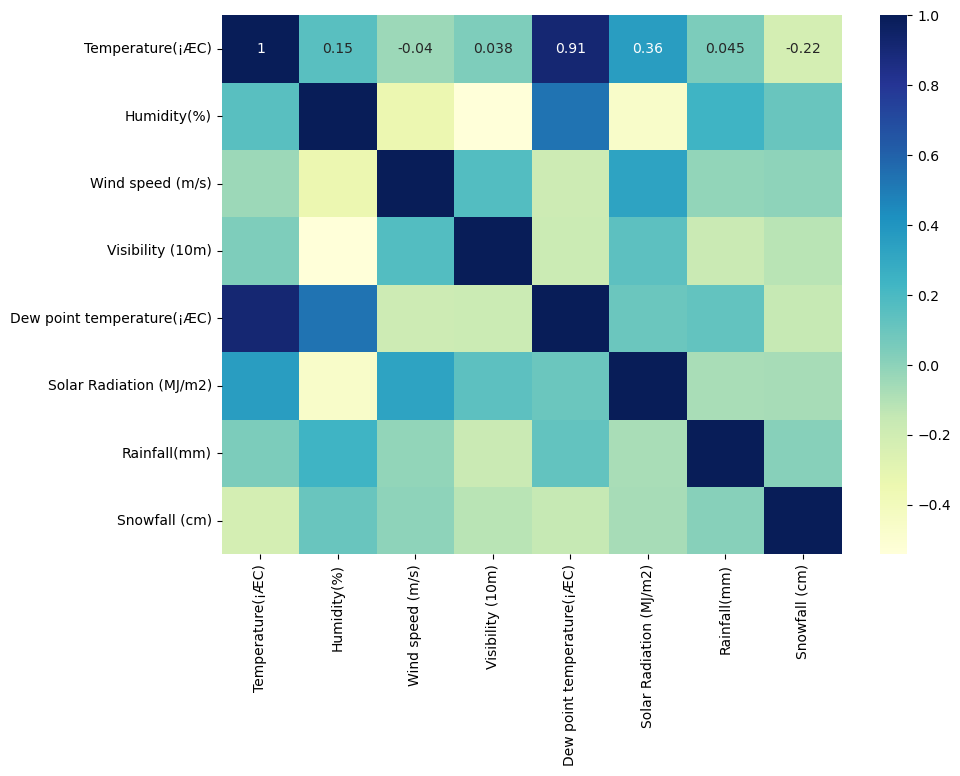

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(data_weather.corr(),cmap = "YlGnBu", annot= True)
# 온도,이슬점 : 
# 습도, 이슬점 : 
# 

##### Temperature(¡ÆC)
- 기온 
- 대여수에 대한 영향력 가장 커보임

c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\foma\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

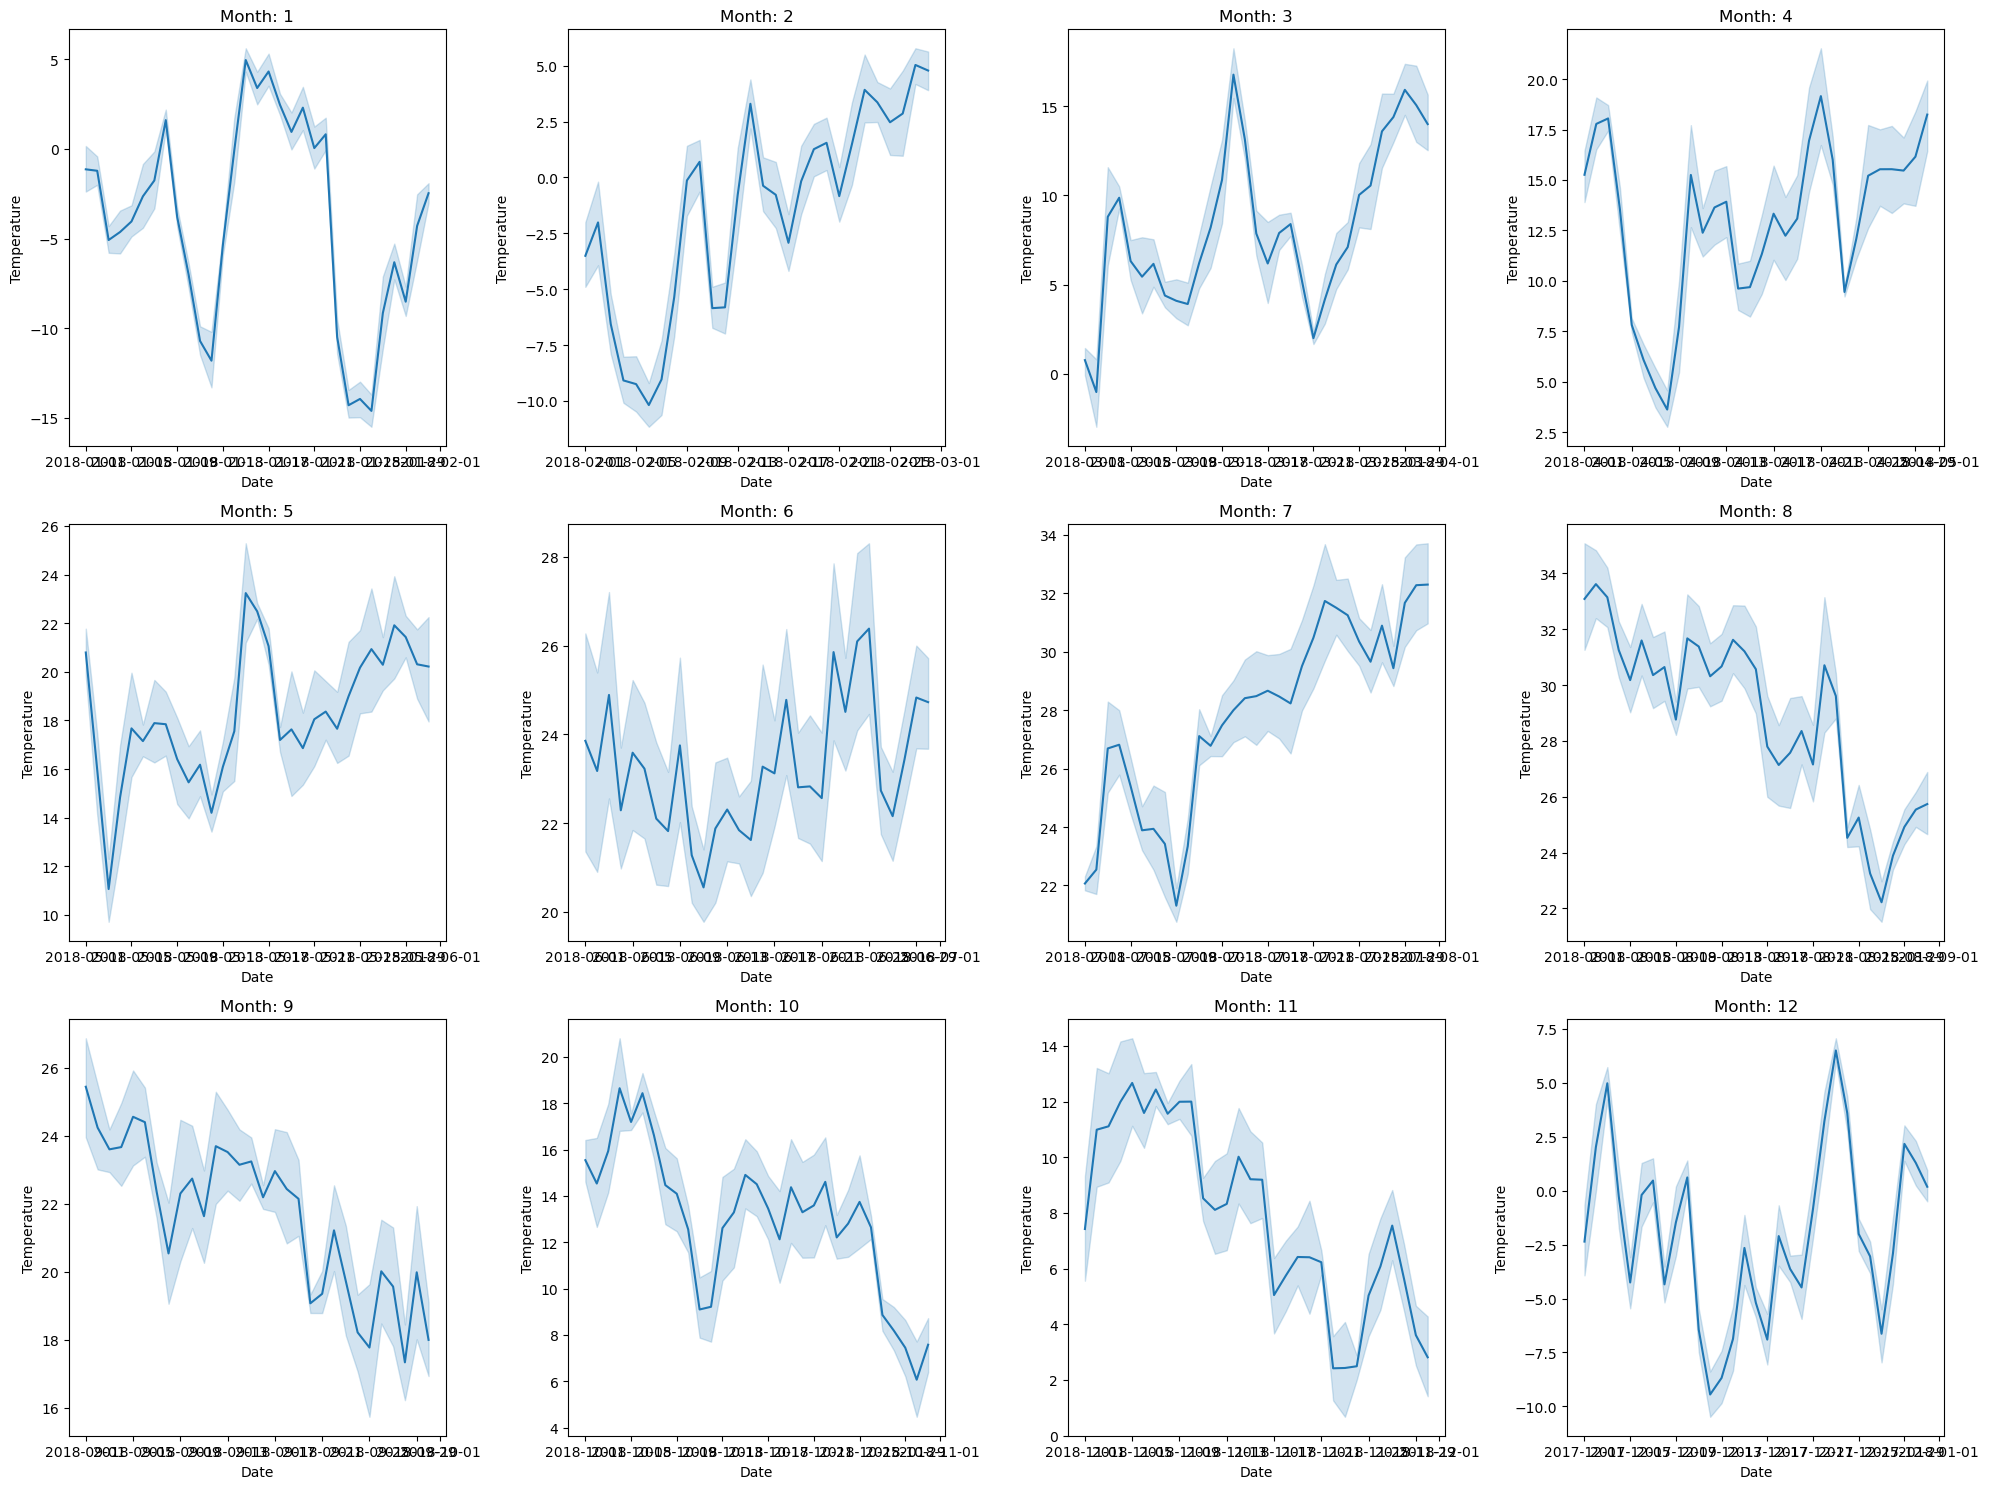

In [50]:
# 서브플롯 생성 (3x4 배열)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# 각 월별 데이터에 대해 선 그래프 그리기
months = {}
for month in range(1, 13):
    months[month] = datass[datass['Date'].dt.month == month]
    
for month, ax in zip(range(1, 13), axes):
    sns.lineplot(data=months[month], x='Date', y='Temperature(¡ÆC)', ax=ax)
    ax.set_title(f'Month: {month}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')

plt.tight_layout()
plt.show()

<Axes: xlabel='Month', ylabel='Temperature(¡ÆC)'>

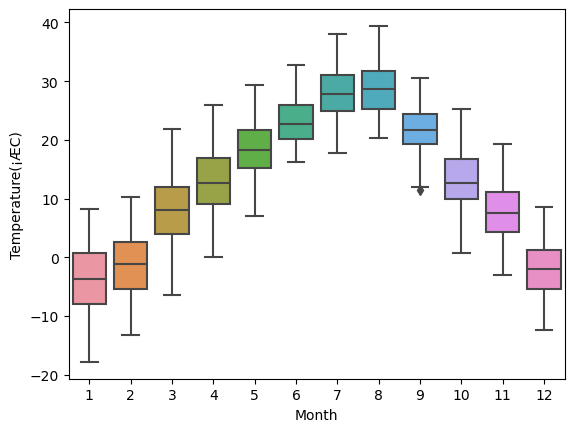

In [51]:
# 월별 기온
sns.boxplot(datass, x='Month',y='Temperature(¡ÆC)')

##### Humidity(%)
- 습도 : 공기 중에 포함되어 있는 수증기의 양

<Axes: xlabel='Month', ylabel='Humidity(%)'>

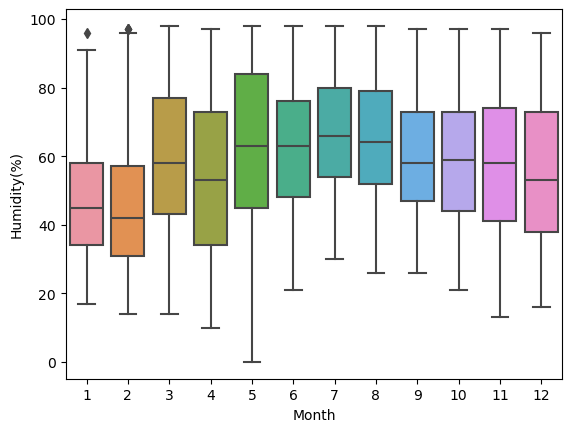

In [52]:
sns.boxplot(datass, x='Month',y='Humidity(%)')
# 전체적으로 비슷?

In [53]:
# 계절별 습도의 차이 가설검정
import scipy.stats as stats

# 계절별 데이터 나누기
spring_data = datass[datass['Seasons'] == 'Spring']['Humidity(%)']
summer_data = datass[datass['Seasons'] == 'Summer']['Humidity(%)']
fall_data = datass[datass['Seasons'] == 'Autumn']['Humidity(%)']
winter_data = datass[datass['Seasons'] == 'Winter']['Humidity(%)']

# ANOVA 검정 수행 - 네 집단의 평균 비교
statistic, p_value = stats.f_oneway(spring_data, summer_data, fall_data, winter_data)

# 결과 출력
print(f'ANOVA results:')
print(f'F-statistic: {statistic}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('통계적으로 유의미한 차이가 있습니다.')
else:
    print('통계적으로 유의미한 차이가 없습니다.')

# 계절별 습도 차이 존재하는 것 확인

ANOVA results:
F-statistic: 179.69154252848037
P-value: 3.021161295856675e-112
통계적으로 유의미한 차이가 있습니다.


##### Dew point temperature(¡ÆC)
- 이슬점 : 이슬이 형성되는 온도
- 대기 중 습도를 측정하는 단위

<Axes: xlabel='Month', ylabel='Dew point temperature(¡ÆC)'>

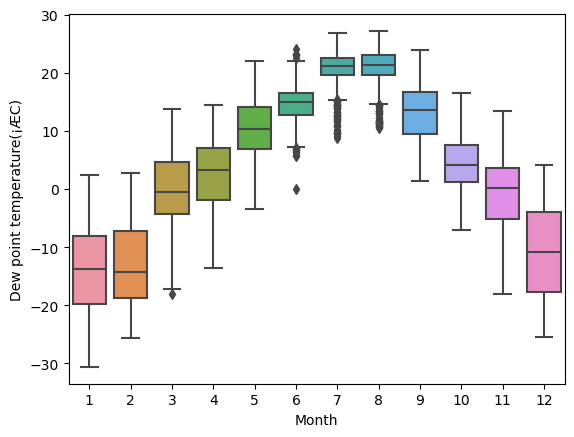

In [54]:
sns.boxplot(datass, x='Month',y='Dew point temperature(¡ÆC)')

<Axes: xlabel='Seasons', ylabel='Dew point temperature(¡ÆC)'>

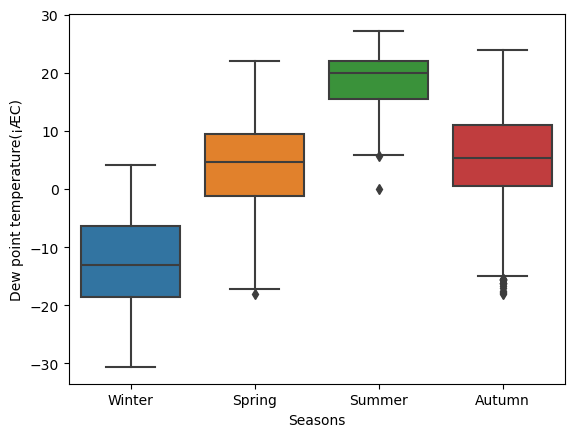

In [55]:
sns.boxplot(datass, x = 'Seasons',y='Dew point temperature(¡ÆC)')

##### Solar Radiation (MJ/m2)
- 일사량 : 지표면 도달 태양복사에너지
- 계절,시간,대기상태(구름양)에 영향을 받음

<Axes: xlabel='Month', ylabel='Solar Radiation (MJ/m2)'>

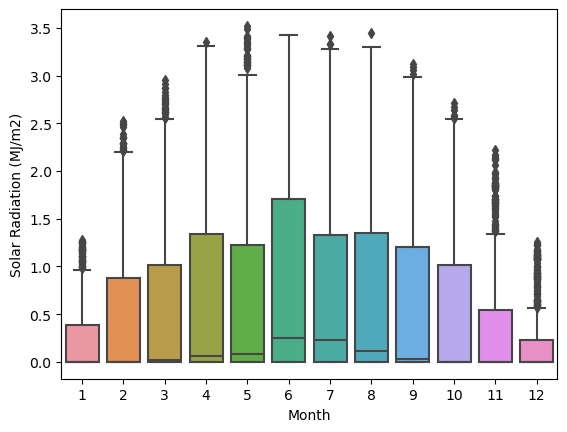

In [56]:
sns.boxplot(datass, x='Month',y='Solar Radiation (MJ/m2)')

<Axes: xlabel='Seasons', ylabel='Solar Radiation (MJ/m2)'>

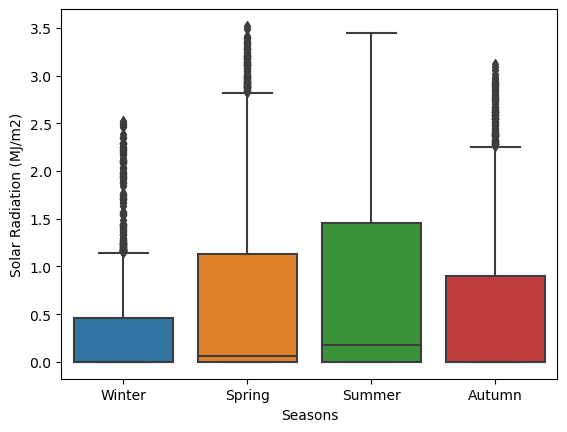

In [57]:
sns.boxplot(datass, x = 'Seasons',y='Solar Radiation (MJ/m2)')

##### Rainfall(mm)
- 강수량
- 강수량 OX로 나눠서 대여량 비교해보기

<Axes: xlabel='Month', ylabel='Dew point temperature(¡ÆC)'>

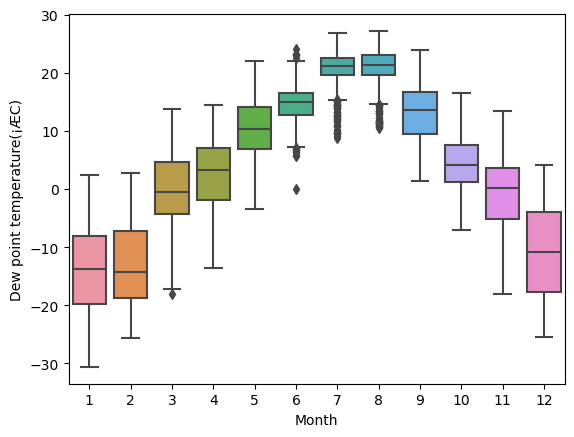

In [58]:
sns.boxplot(datass, x='Month',y='Dew point temperature(¡ÆC)')

In [59]:
datass['RR'] = datass['Rainfall(mm)'].apply(lambda x: 1 if x > 0 else 0)

In [60]:
datass['RR'].value_counts()

RR
0    6588
1     420
Name: count, dtype: int64

Text(0.5, 0, 'RR (0: Rainfall(mm) = 0, 1: Rainfall(mm) > 0)')

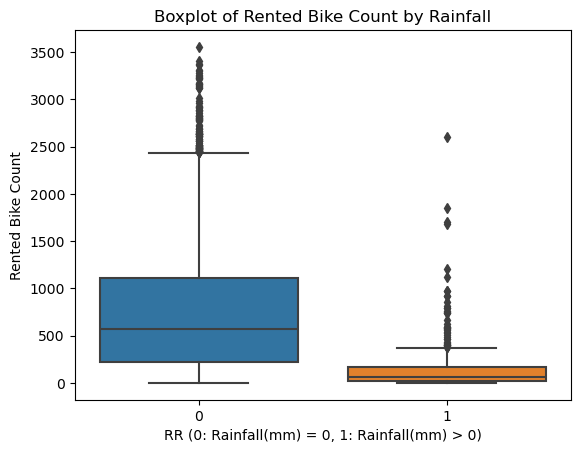

In [61]:
sns.boxplot(x='RR', y='Rented Bike Count', data=datass)
plt.title('Boxplot of Rented Bike Count by Rainfall')
plt.xlabel('RR (0: Rainfall(mm) = 0, 1: Rainfall(mm) > 0)')

In [62]:
# 강수유무에 따른 대여수 비교

group_0 = datass[datass['RR'] == 0]['Rented Bike Count']
group_1 = datass[datass['RR'] == 1]['Rented Bike Count']

# 독립표본 t-검정 수행 - 두 집단의 평균 비교
t_statistic, p_value = stats.ttest_ind(group_0, group_1)

# 결과 출력
print('Independent t-test results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('통계적으로 유의미한 차이가 있습니다.')
else:
    print('통계적으로 유의미한 차이가 없습니다.')

# 비가 올 때와 오지 않을 때, 대여량의 유의미한 차이가 있다. 

Independent t-test results:
T-statistic: 18.54811930675664
P-value: 5.168134056986651e-75
통계적으로 유의미한 차이가 있습니다.


##### Snowfall (cm)

<Axes: xlabel='Seasons', ylabel='Snowfall (cm)'>

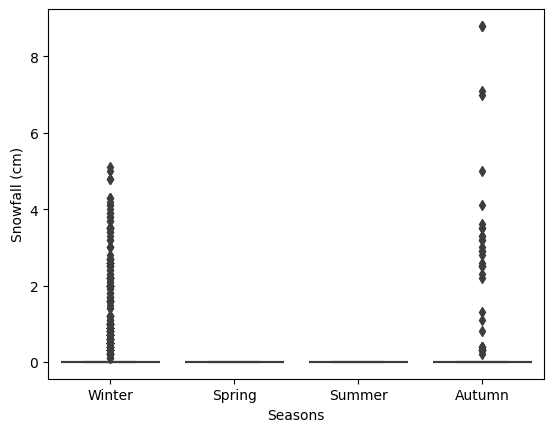

In [63]:
sns.boxplot(datass, x = 'Seasons',y='Snowfall (cm)')

##### Wind speed (m/s)

<Axes: xlabel='Seasons', ylabel='Wind speed (m/s)'>

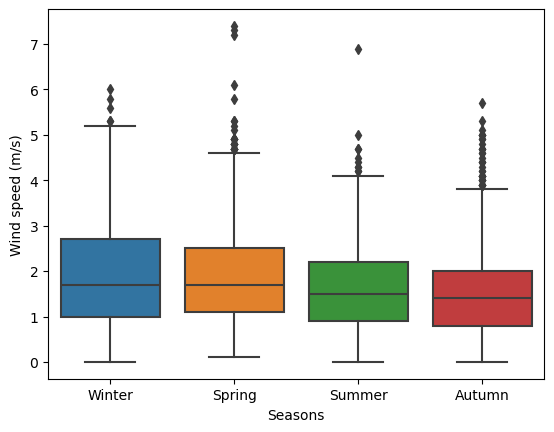

In [64]:
sns.boxplot(datass, x = 'Seasons',y='Wind speed (m/s)')

##### Visibility (10m)

<Axes: xlabel='Seasons', ylabel='Visibility (10m)'>

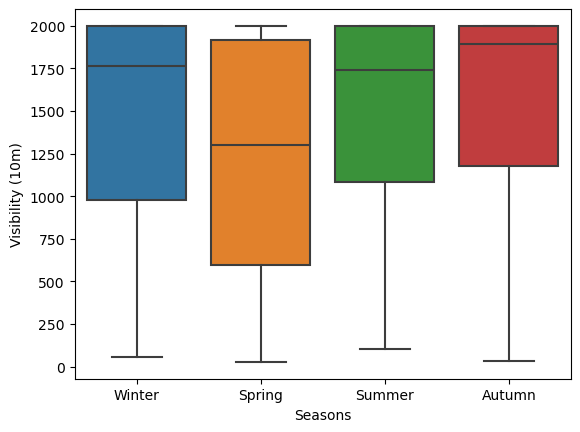

In [65]:
sns.boxplot(datass, x = 'Seasons',y='Visibility (10m)')

#### 휴일 변수

##### Holiday	
- 주말(토,일) 포함 X
- 월~금 중에 Holiday인 날은 언제언제 있는지 확인.
- Holiday에 따른 대여수 확인

In [66]:
datass['Holiday'].value_counts()

Holiday
No Holiday    6679
Holiday        329
Name: count, dtype: int64

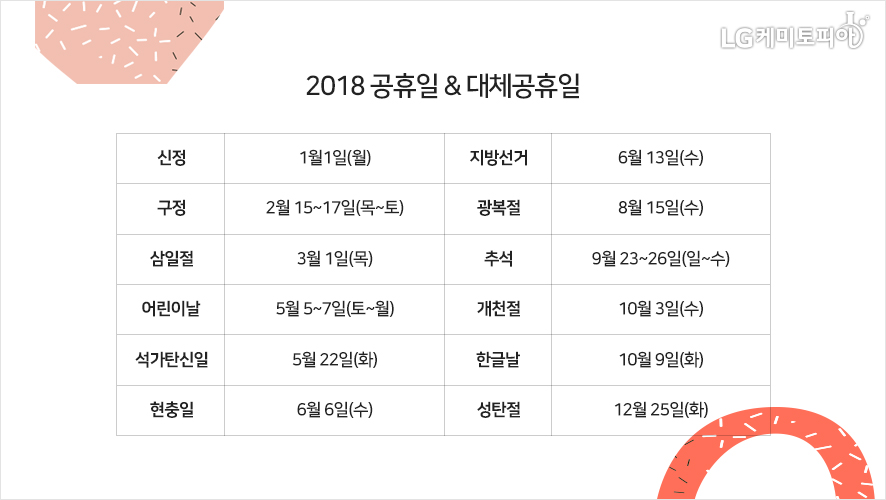

In [67]:
from IPython.display import Image 
Image("./2018년휴일.JPG")

[휴일]
1. 주말 : 토요일(5),일요일(6)
2. 2018년 공휴일 : 사진 참고
3. 2017년 휴일 : 12.20(수) 19대 대선> 취소, 12.22(금)???, 12.24(일) 이브, 12.25(월) 크리스마스, 12.31(일) ??

In [68]:
datass['day of week'] = datass['Date'].dt.dayofweek
# 0 월
# 1 화
# 2 수
#
# 6 일


In [69]:
N_Holi = datass[datass['Holiday'] == 'No Holiday']
Holi = datass[datass['Holiday'] == 'Holiday']

In [70]:
Holi[['Date','day of week']].drop_duplicates()['day of week'].value_counts().sort_index()

day of week
0    3
1    4
2    3
3    2
4    2
5    1
6    3
Name: count, dtype: int64

In [71]:
Holi[['Date','day of week']].drop_duplicates()

,Date,day of week
1730,2017-12-22,4
6288,2017-12-24,6
4563,2017-12-25,0
1459,2017-12-31,6
4810,2018-01-01,0
2062,2018-02-15,3
4360,2018-02-16,4
5271,2018-02-17,5
1101,2018-03-01,3
3171,2018-05-01,1


<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

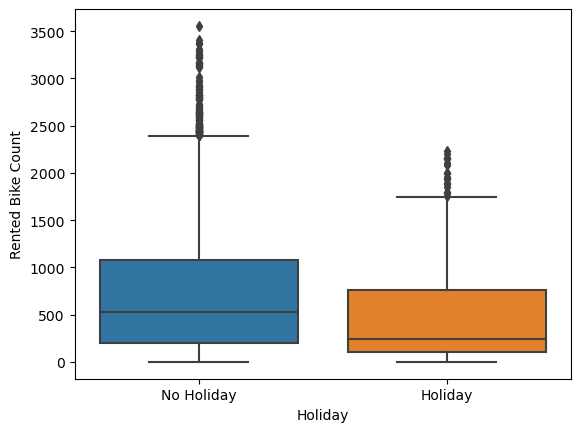

In [72]:
sns.boxplot(x='Holiday', y='Rented Bike Count', data=datass)
# 큰 차이 없어보이고, 휴일에 대여량이 더 많지는 않음

In [73]:
# 휴일여부에 따른 대여수 비교 - 단측검정

group_H = datass[datass['Holiday'] == 'Holiday']['Rented Bike Count']
group_N = datass[datass['Holiday'] == 'No Holiday']['Rented Bike Count']

# 독립표본 t-검정 수행 - 단측 검정으로 설정 ('less'는 group_0 < group_1을 검정하는 것을 의미)
t_statistic, p_value = stats.ttest_ind(group_H, group_N, alternative='less')

# 결과 출력
print('Independent one-sided t-test results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('통계적으로 유의미한 차이가 있습니다.')
else:
    print('통계적으로 유의미한 차이가 없습니다.')

Independent one-sided t-test results:
T-statistic: -5.9259167607370395
P-value: 1.626430542314912e-09
통계적으로 유의미한 차이가 있습니다.


##### Functioning Day
- Functioning Day란?
- Functioning Day에 따른 대여수 확인
 

In [74]:
datass['Functioning Day'].value_counts()

Functioning Day
Yes    6772
No      236
Name: count, dtype: int64

In [75]:
Fday= datass[datass['Functioning Day'] == 'Yes']
N_Fday = datass[datass['Functioning Day'] == 'No']

In [76]:
N_Fday[['Date','day of week']].drop_duplicates()['day of week'].value_counts().sort_index()

day of week
1    4
2    2
3    2
4    2
5    2
6    1
Name: count, dtype: int64

In [77]:
N_Fday[['Date','day of week','Rainfall(mm)']].drop_duplicates()
# ???

,Date,day of week,Rainfall(mm)
2347,2018-04-11,2,0.0
5340,2018-05-10,3,0.0
4496,2018-09-18,1,0.0
693,2018-09-19,2,0.0
4269,2018-09-19,2,0.1
5704,2018-09-28,4,0.0
4124,2018-09-30,6,0.0
4805,2018-10-02,1,0.0
505,2018-10-04,3,0.0
3134,2018-10-06,5,1.0


# 과제1 관광어플 '에어비앤비' 데이터 선정 이유 

실제로 이용하고 접해본 것에 대해 더 알아보고 싶어 '에어비앤비'라는 여행 어플의 데이터를 분석해서, 이 어플과 여행 고객에 대해 더 깊이 알고자 한다.